## Sensor Performances
Accordingly with the central limit theorem, which states that a large number of individual measurements having independent errors will converge to a normal (Gaussian) distribution, the performances of measuring sensors (e.g. radars) can be described by using just the  <i>mean</i> $ \mu $ , and the <i>standard deviation</i> $ \sigma $.
Here we simulate a set of measurements by applying a normal distributed error on the nominal (true) value. We define:

- <i>trueDistance</i> as the mean of the normal distribution
- <i>oneSigma</i> as the standard deviation
- <i>nMeasurements</i> as the number of simulated measurements
- <i>sistematicError</i> a non-normally distributed error that may ffect the measurement device


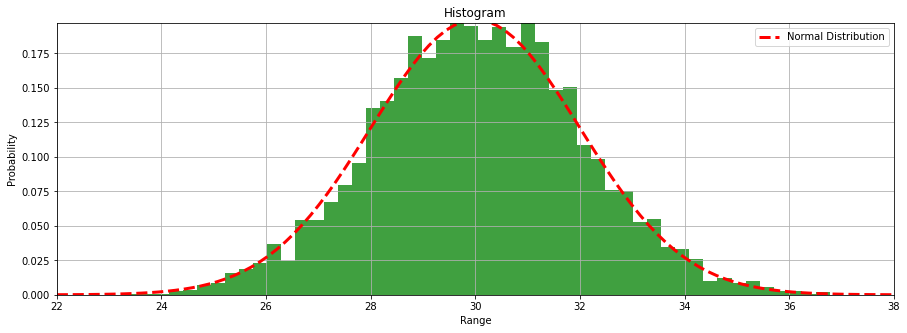

In [2]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import statistics 

############## input data #################
#### test info ####
trueDistance = 30 # meters
nMeasurements = 4000

#### error model ####
oneSigma = 2 # meters. 1-sigma standard deviation of the measurement device
sistematicError = 0 # meters
########### end of input data #############

xMin = trueDistance - 4 * oneSigma
xMax = trueDistance + 4 * oneSigma
measuredDistance = trueDistance + oneSigma * np.random.randn(nMeasurements) + sistematicError

# the histogram of the data
n, bins, patches = plt.hist(measuredDistance, 50, density=1, facecolor='g', alpha=0.75)

# calculate the probability density function
x = np.linspace(xMin, xMax, 100)
plt.plot(x, norm.pdf(x, trueDistance, oneSigma), label='Normal Distribution', linewidth=3, color='red', linestyle='--')

plt.xlabel('Range')
plt.ylabel('Probability')
plt.title('Histogram')
plt.axis([xMin, xMax, 0, np.amax(n)])
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(True)
leg = plt.legend()


From the measurements values we've got we can calculate the mean and the standard deviation of the data set

In [3]:
print("Mean value of measurements is % s " 
                % (statistics.mean(measuredDistance)))
print("Standard Deviation of measurements is % s " 
                % (statistics.stdev(measuredDistance)))

Mean value of measurements is 30.056517615958015 
Standard Deviation of measurements is 1.986910589421642 


The measurements are then used to calculate the residuals. A residual is the difference between the measured value and the value expected from the model (in this specific case, the expected value is the true one).
If we divide the residuals by the 1-sigma uncertainty we then obtain the residual ratios

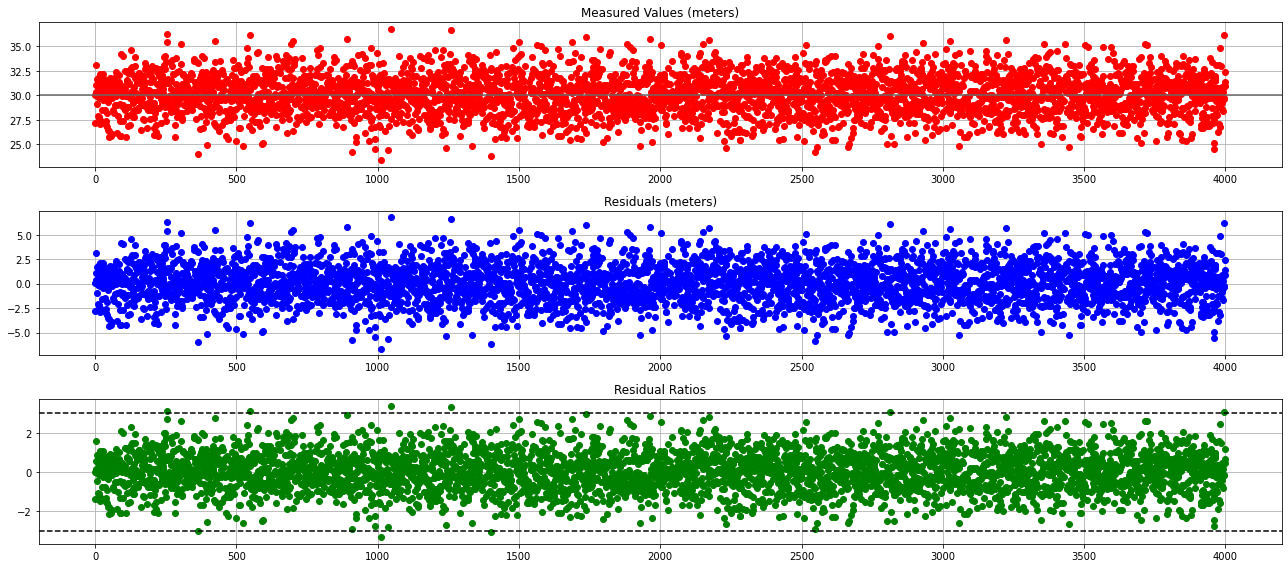

In [4]:
%matplotlib inline

# import math functions
from math import *
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# calculate the residuals
residuals = measuredDistance - np.full((nMeasurements), trueDistance)

# calculate residual ratios
rRatios = residuals/oneSigma

f = plt.figure(figsize=(18,8))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

ax1.plot(measuredDistance, 'ro')
ax1.title.set_text('Measured Values (meters)')
ax1.axhline(y= trueDistance, color='dimgrey', linestyle='-')
ax1.grid(True)

ax2.plot(residuals, 'bo')
ax2.title.set_text('Residuals (meters)')
ax2.grid(True)

ax3.plot(rRatios, 'go')
ax3.title.set_text('Residual Ratios')
ax3.axhline(y= -3, color='black', linestyle='--')
ax3.axhline(y= 3, color='black', linestyle='--')
ax3.grid(True)
plt.tight_layout()